In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
pd.options.mode.chained_assignment = None  # default='warn'

# Analysis by Age and by Education

In [4]:
# Save the csv data to a dataframe
mental_data = pd.read_csv('Resources/mental_data_Anxiety_and_Depressive_disorder.csv')
mental_data

,Unnamed: 0,Group,Subgroup,Value,Time Period Start Date,Time Period Label,Date
0,0,National Estimate,United States,35.9,04/23/2020,"Apr 23 - May 5, 2020",2020-04-23
1,50,By State,New Mexico,34.6,04/23/2020,"Apr 23 - May 5, 2020",2020-04-23
2,49,By State,New Jersey,37.6,04/23/2020,"Apr 23 - May 5, 2020",2020-04-23
3,48,By State,New Hampshire,34.8,04/23/2020,"Apr 23 - May 5, 2020",2020-04-23
4,47,By State,Nevada,34.8,04/23/2020,"Apr 23 - May 5, 2020",2020-04-23
...,...,...,...,...,...,...,...
3409,3511,By Education,High school diploma or GED,35.3,06/29/2022,"Jun 29 - Jul 11, 2022",2022-06-29
3410,3510,By Education,Less than a high school diploma,39.0,06/29/2022,"Jun 29 - Jul 11, 2022",2022-06-29
3411,3509,By Race/Hispanic ethnicity,"Non-Hispanic, other races and multiple races",43.0,06/29/2022,"Jun 29 - Jul 11, 2022",2022-06-29
3412,3516,By State,Alabama,37.4,06/29/2022,"Jun 29 - Jul 11, 2022",2022-06-29


##### Extract the data for a group

In [3]:
# Extract the data for a given group
def extract_mental_data_group (group):
    
    # Extract the columns needed for analysis
    mental_data_group = mental_data.loc[  (mental_data["Group"]     == group)
                                       ].reset_index(drop=True)

    # Create df for the average Value by Subgroup
    subgroup_df = mental_data_group.groupby(["Subgroup"])
    by_subgroup = subgroup_df["Value"].mean()
    
    # return DataFrame
    return mental_data_group

##### Create the line graph of Time Period vs average depression rate

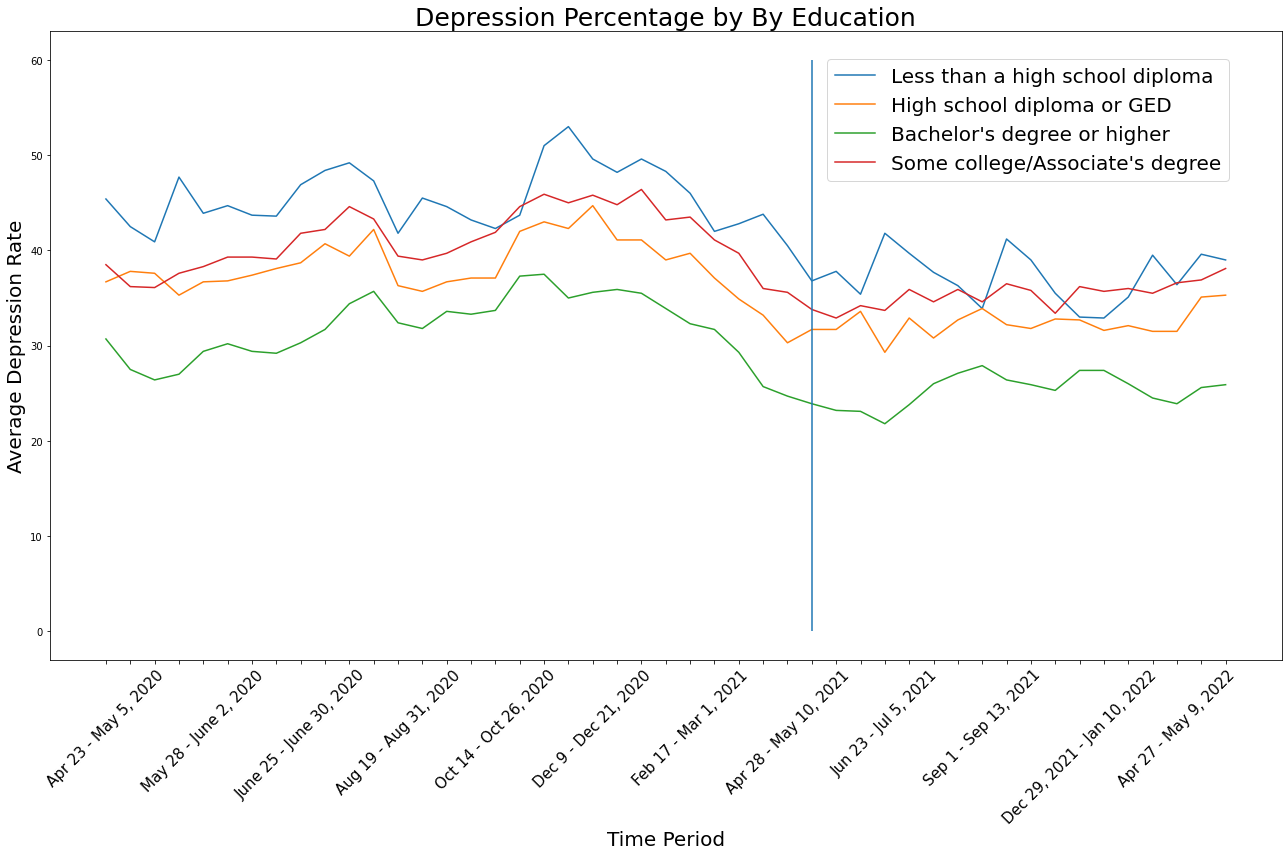

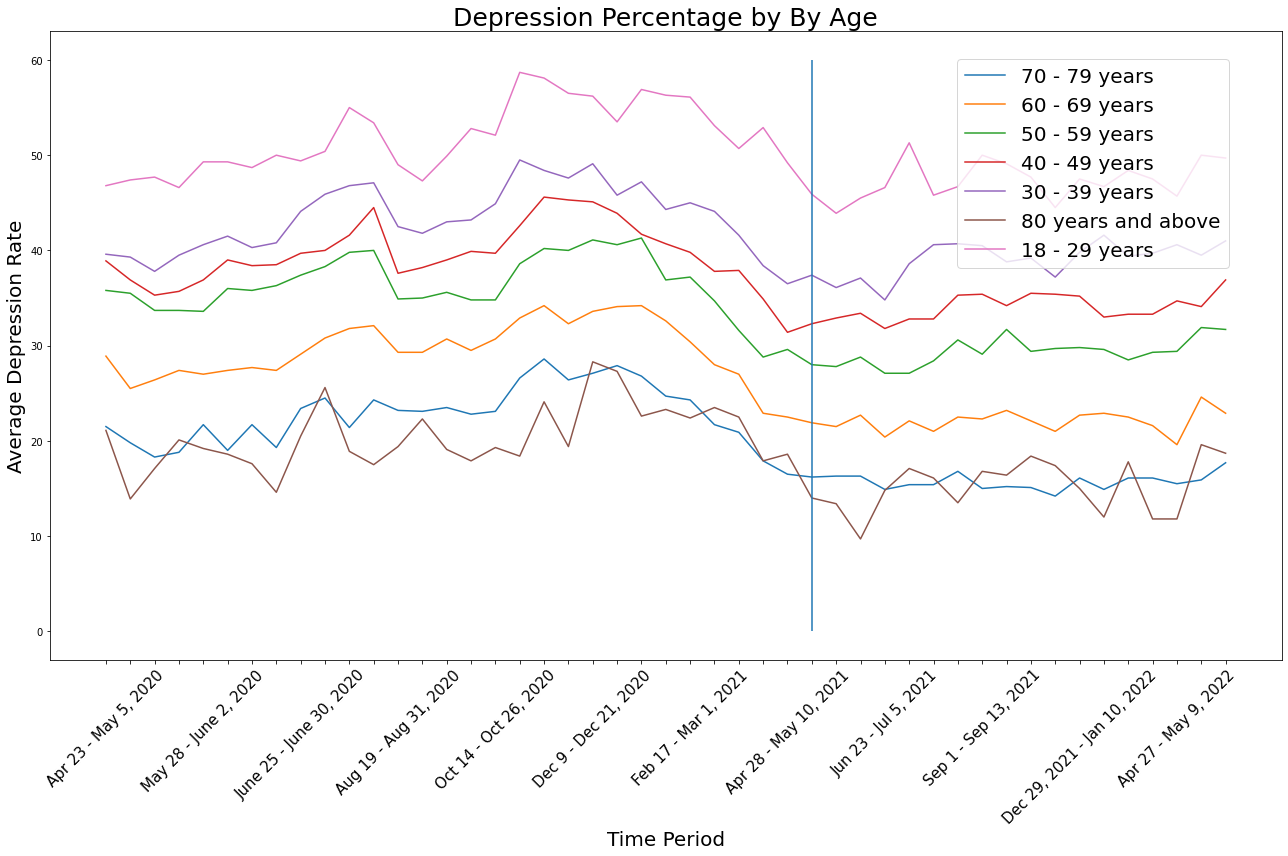

In [4]:
# Save group into a list
groups = ["By Education", "By Age"]

# Create graph for each group
for group in groups:
    
    # Extract the data for each group
    mental_data_group = extract_mental_data_group(group)
    subgroups         = mental_data_group['Subgroup'].unique()
    
    # Create subgroup list
    subgroup_list = []
    
    # Define subplot
    fig1, ax1  = plt.subplots()
    
    # Plot line for each subgroup
    for subgroup in subgroups:
        
        # Save the subgroup in a list
        subgroup_list.append(subgroup)
        
        # Extract subgroup data
        subgroup_df       = mental_data_group.loc[mental_data_group["Subgroup"] == subgroup]
        time_period       = subgroup_df.groupby (["Date"])
        time_period_mean  = time_period ["Value"].mean()
             
        # Save the Average Depression Rate and Time Period   
        x_axis = time_period_mean.index
        y_axis = time_period_mean
        
        # Plot the Average Depression Rate vs Time Period
        ax1.plot(x_axis, y_axis)
        
    # Add a vertical lines in the graph
    ax1.vlines(ymin=0,ymax=60,x='2021-05-12')
            
    # Save the Time Period Label as labels list
    labels = mental_data_group['Time Period Label'].unique().tolist()
    
    # Reduce the tick labels
    every_nth = 4
    for n, label in enumerate(ax1.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False) 
            
     # Set ticks label
    ax1.set_xticks(x_axis, labels, rotation = 45,fontsize=15)
        
    # Set the title, x and y label     
    ax1.set_title(f"Depression Percentage by {group}",fontsize=25)
    ax1.set_xlabel('Time Period',fontsize=20)
    ax1.set_ylabel('Average Depression Rate',fontsize=20)
    
    # Set the graph properties
    fig1.set_size_inches(18, 12)
    fig1.tight_layout()
    fig1.legend(subgroup_list,loc="upper right", borderaxespad=3,fontsize=20)
    
    # Save and show the Plot
    
    # Replace special characters in group, this will be used as part of the filename
    outfile_group = group
    special_chars = "/' '"

    for special_char in special_chars:
        outfile_group    = outfile_group.replace(special_char, '_')
        
    plt.savefig(f"output_data/line_all_{outfile_group}")
    plt.show()

# Sexual Orientation Analysis

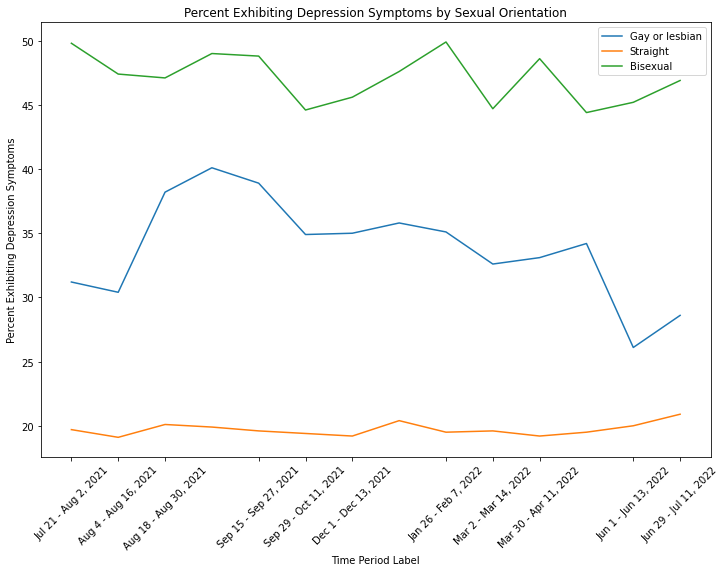

In [6]:
depression_orientation = pd.read_csv("Resources/depression_orientation.csv")
anxiety_orientation = pd.read_csv("Resources/anxiety_orientation.csv")
depression_gender=pd.read_csv("Resources/depression_gender.csv")
anxiety_gender=pd.read_csv("Resources/anxiety_gender.csv")
plt.figure(figsize=(12,8))
for orientation in depression_orientation["Subgroup"].unique():
    plt.plot(depression_orientation.loc[depression_orientation["Subgroup"]==orientation,"Time Period Start Date"],
                         depression_orientation.loc[depression_orientation["Subgroup"]==orientation,"Value"],label=orientation)

plt.legend(loc="best")
label = depression_orientation["Time Period Start Date"]
tick_loc = label[0:len(label):4]
dates=depression_orientation["Time Period Label"]
xticks=dates[0:len(dates):4]
plt.xticks(ticks=tick_loc,labels=xticks,rotation=45)
plt.title("Percent Exhibiting Depression Symptoms by Sexual Orientation")
plt.ylabel("Percent Exhibiting Depression Symptoms")
plt.xlabel("Time Period Label")
plt.show()

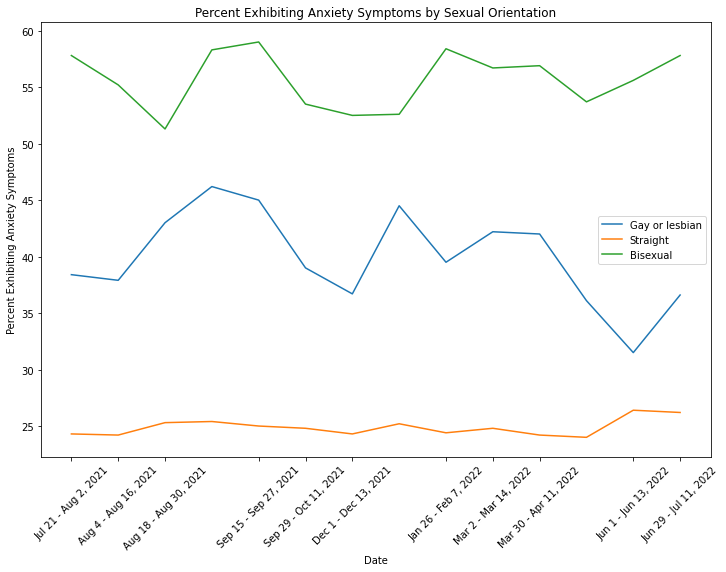

In [27]:
plt.figure(figsize=(12,8))

for orientation in anxiety_orientation["Subgroup"].unique():
    plt.plot(anxiety_orientation.loc[anxiety_orientation["Subgroup"]==orientation,"Time Period Start Date"],
                         anxiety_orientation.loc[anxiety_orientation["Subgroup"]==orientation,"Value"],label=orientation)
plt.legend(loc="best")
label = anxiety_orientation["Time Period Start Date"]
tick_loc = label[0:len(label):4]
dates=anxiety_orientation["Time Period Label"]
xticks=dates[0:len(dates):4]
plt.xticks(ticks=tick_loc,labels=xticks,rotation=45)
plt.title("Percent Exhibiting Anxiety Symptoms by Sexual Orientation")
plt.ylabel("Percent Exhibiting Anxiety Symptoms")
plt.xlabel("Time Period Label")
plt.show()

# Sexual Gender Analysis

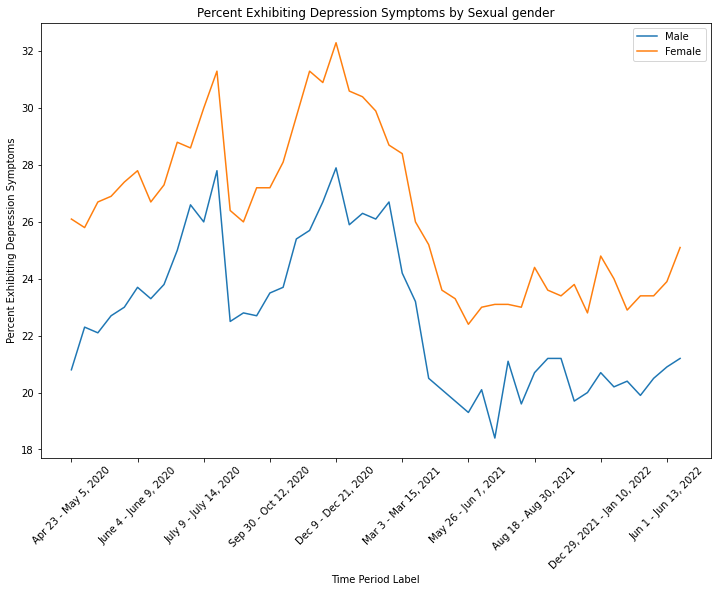

In [7]:
plt.figure(figsize=(12,8))
plt.plot(depression_gender.loc[depression_gender["Subgroup"]=="Male","Time Period Start Date"],
                         depression_gender.loc[depression_gender["Subgroup"]=="Male","Value"])
plt.plot(depression_gender.loc[depression_gender["Subgroup"]=="Female","Time Period Start Date"],
                         depression_gender.loc[depression_gender["Subgroup"]=="Female","Value"])
plt.legend(["Male","Female"],loc="best")
label = depression_gender["Time Period Start Date"]
tick_loc = label[0:len(label):10]
dates=depression_gender["Time Period Label"]
xticks=dates[0:len(dates):10]
plt.xticks(ticks=tick_loc,labels=xticks,rotation=45)
plt.title("Percent Exhibiting Depression Symptoms by Sexual gender")
plt.ylabel("Percent Exhibiting Depression Symptoms")
plt.xlabel("Time Period Label")
plt.show()

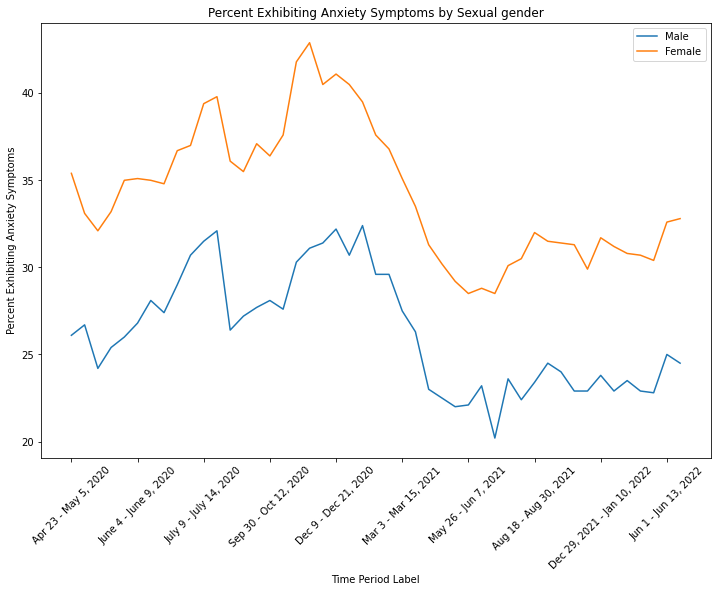

In [8]:
plt.figure(figsize=(12,8))
plt.plot(anxiety_gender.loc[anxiety_gender["Subgroup"]=="Male","Time Period Start Date"],
                         anxiety_gender.loc[anxiety_gender["Subgroup"]=="Male","Value"])
plt.plot(anxiety_gender.loc[anxiety_gender["Subgroup"]=="Female","Time Period Start Date"],
                         anxiety_gender.loc[anxiety_gender["Subgroup"]=="Female","Value"])
plt.legend(["Male","Female"],loc="best")
label = anxiety_gender["Time Period Start Date"]
tick_loc = label[0:len(label):10]
dates=anxiety_gender["Time Period Label"]
xticks=dates[0:len(dates):10]
plt.xticks(ticks=tick_loc,labels=xticks,rotation=45)
plt.title("Percent Exhibiting Anxiety Symptoms by Sexual gender")
plt.ylabel("Percent Exhibiting Anxiety Symptoms")
plt.xlabel("Time Period Label")
plt.show()

# Vaccination and Mental Health

In [5]:
#Vaccine Data
vaccine_df = pd.read_csv('Resources/vaccine_data_df_2.csv')
vaccine_df = vaccine_df.drop(columns=['Unnamed: 0'])
vaccine_df = vaccine_df.dropna().reset_index(drop=True)
def vax_plot(state, x, color):
    state_df = vaccine_df.loc[vaccine_df['State'] == state]
    ax[x].scatter(state_df['Completeness_pct'], state_df['Value'], color=color)
    ax[x].set_title(f'Vax Rate vs Mental Wellbeing in {state}', fontsize=20)
    ax[x].set_xlabel('Vaxination Rate (%)', fontsize=15)
    ax[x].set_ylabel('Anxiety/Depression Rate (%)',fontsize=15)

<Figure size 14400x14400 with 0 Axes>

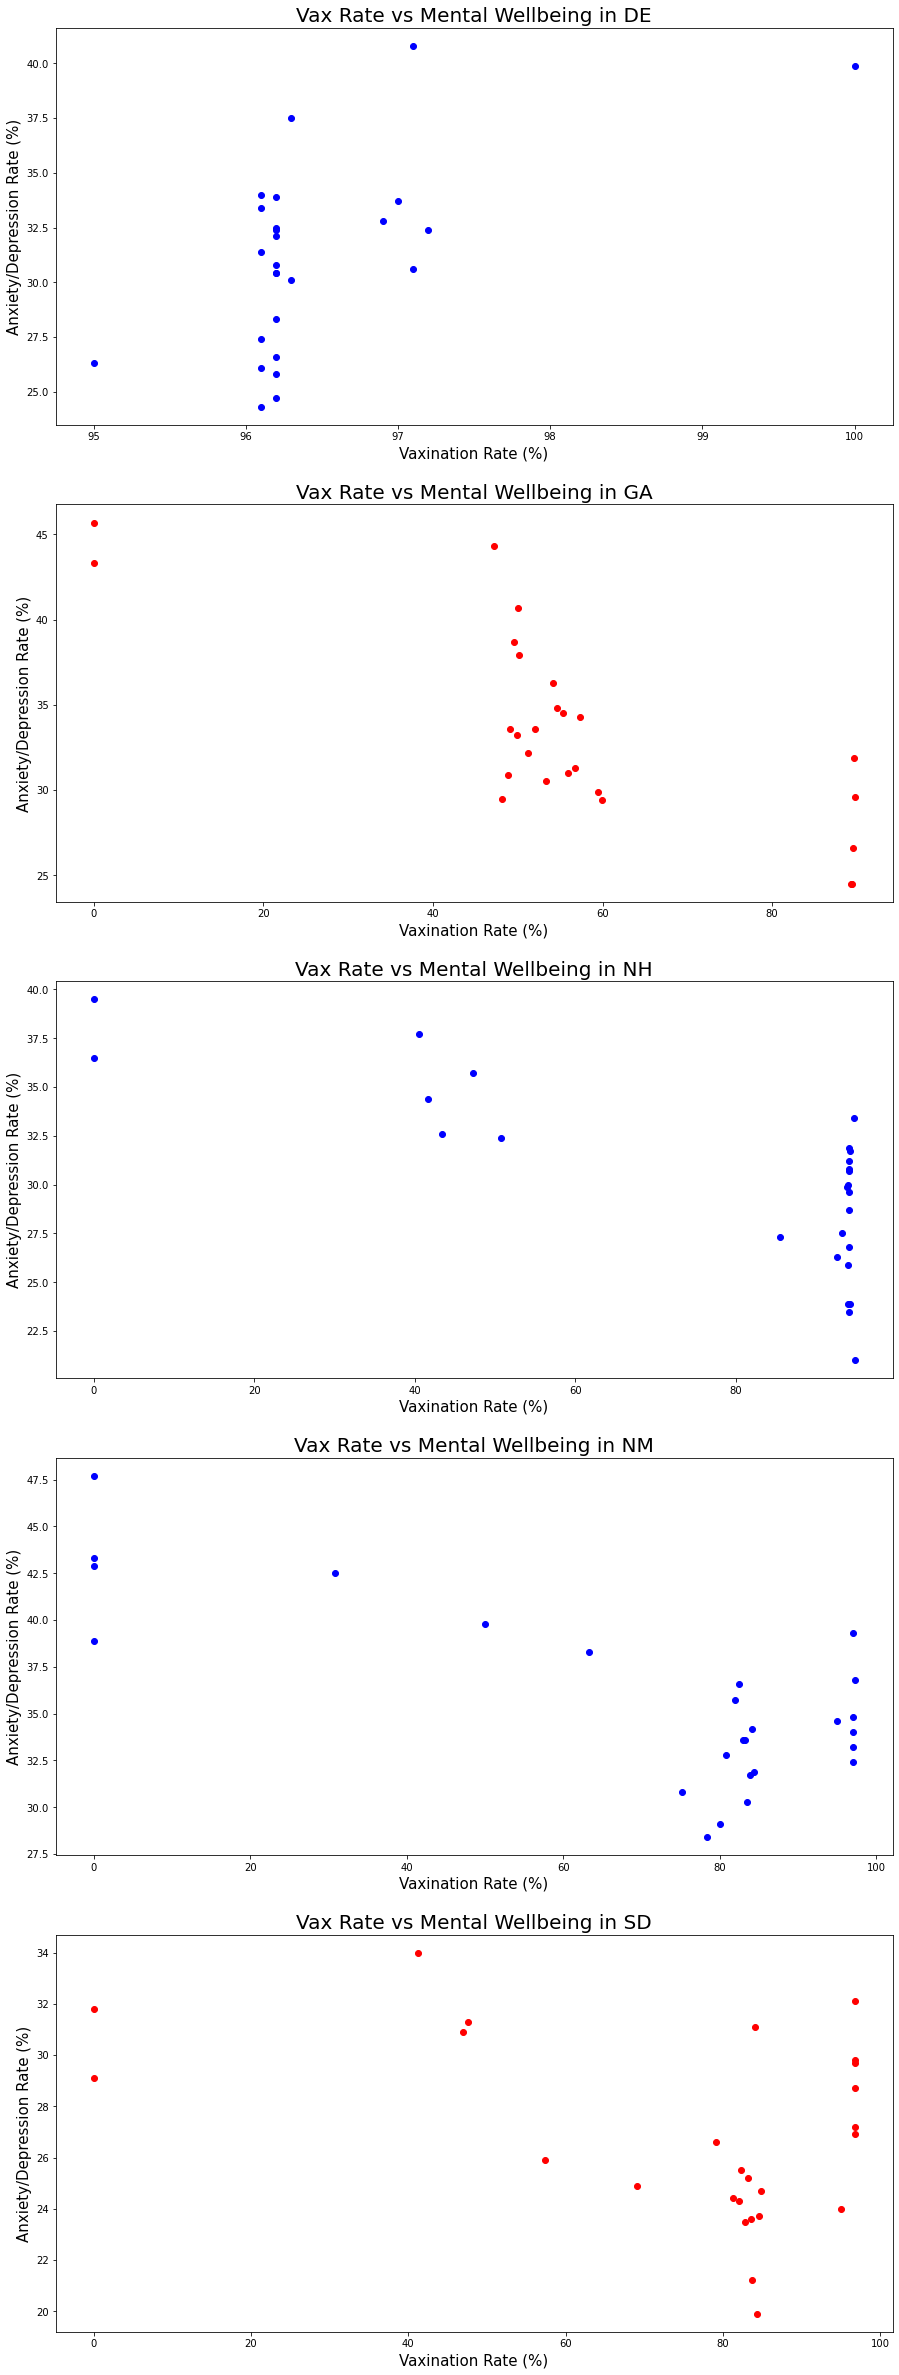

In [6]:
state_list = ['DE', 'GA', 'NH', 'NM', 'SD']
color_list = ['b', 'r', 'b', 'b', 'r']
plt.figure(figsize=[200,200])
fig, ax = plt.subplots(5, figsize=(15,40))
plt.subplots_adjust(left=0.125, right=0.9,bottom=0.1,top=0.9,wspace=0.2, hspace = 0.2)
x_axis = 0
for state in state_list:
    vax_plot(state, x_axis, color_list[x_axis])
    x_axis += 1
plt.savefig('Vax_rate_by_state.png')
plt.show()

# State Analysis

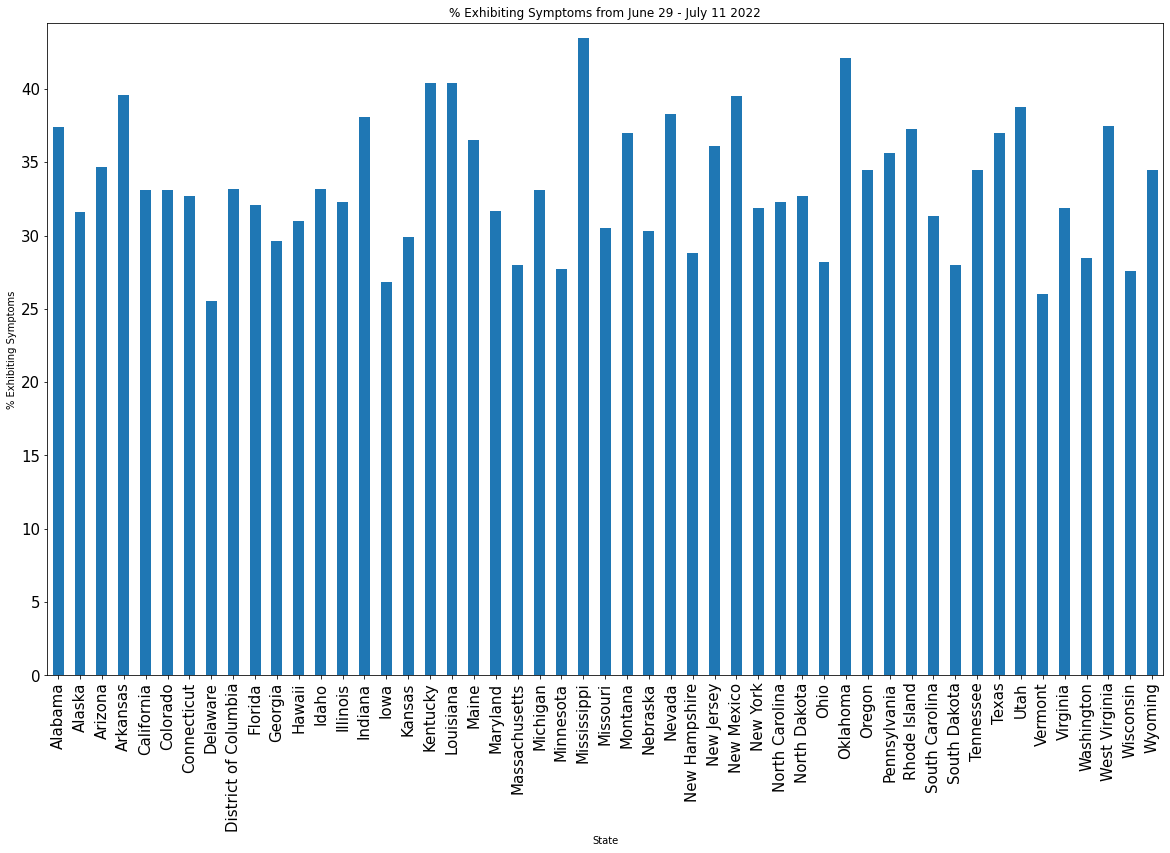

In [7]:
state_dataset = pd.read_csv("Resources/state_dataset.csv")
labels = pd.DataFrame({"Time Period Label":state_dataset["Time Period Label"].unique(),"Time Period Start Date":state_dataset["Time Period Start Date"].unique()})
recent =state_dataset.loc[state_dataset["Time Period Label"]=="Jun 29 - Jul 11, 2022",:]
recent.plot(kind="bar",x="State",y="Value",xlabel="State",ylabel="% Exhibiting Symptoms",figsize=(20,12),
                 ylim=(0,max(recent["Value"]+1)),legend=False,fontsize=15,title="% Exhibiting Symptoms from June 29 - July 11 2022")
plt.show()

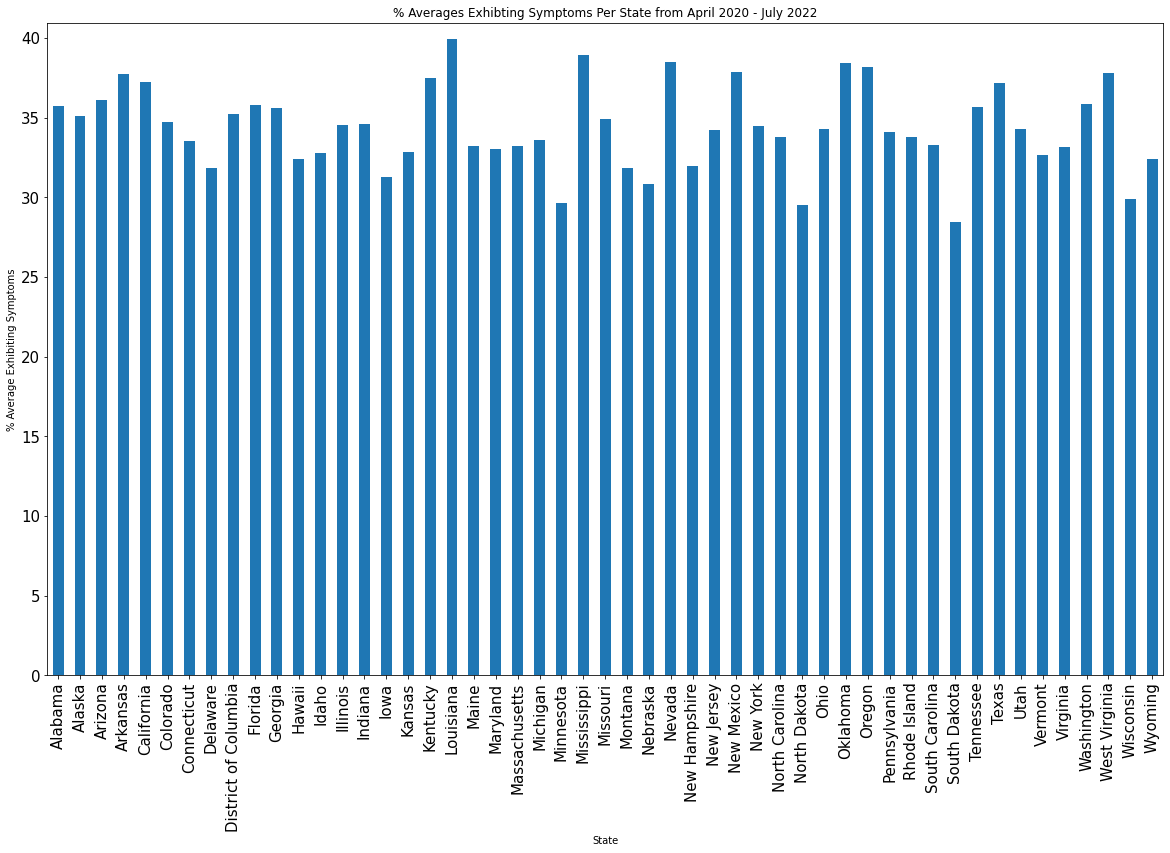

In [9]:
state_avg = pd.DataFrame(state_dataset.groupby("State").mean()["Value"])
state_avg.plot(kind="bar",y="Value",xlabel="State",ylabel="% Average Exhibiting Symptoms",
                 title = "% Averages Exhibting Symptoms Per State from April 2020 - July 2022",figsize=(20,12),
                 ylim=(0,max(state_avg["Value"]+1)),legend=False,fontsize=15)
plt.show()

In [10]:
state_avg = state_dataset.groupby("called")
summary_stats = state_avg["Value"].agg([("Mean",np.mean),("Median",np.median),("Mode",st.mode),("Variance",np.var),("Standard Deviation",np.std),
                                        ("SEM",st.sem)])
summary_stats

,Mean,Median,Mode,Variance,Standard Deviation,SEM
called,,,,,,
D,34.182979,33.8,"([28.0], [17])",28.020578,5.293447,0.151427
R,34.607064,34.2,"([29.8], [14])",28.852565,5.371458,0.156702


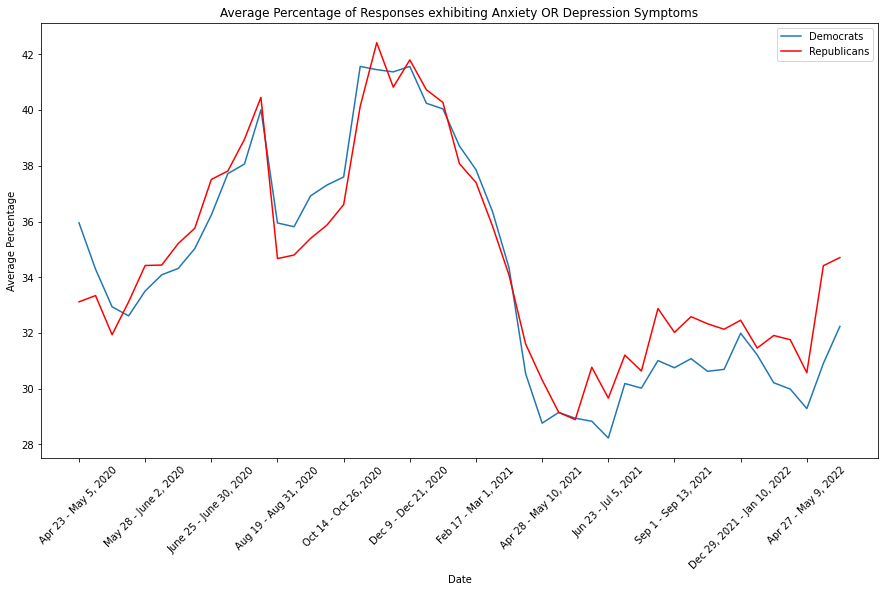

In [14]:
plt.figure(figsize=(15,8))
democrats_mental = pd.DataFrame(state_dataset.loc[state_dataset["called"]=="D",:].groupby("Time Period Start Date").mean() \
["Value"]).reset_index(drop=False).sort_values("Time Period Start Date")
democrats_mental = pd.merge(democrats_mental,labels,on="Time Period Start Date")
republicans_mental = state_dataset.loc[state_dataset["called"]=="R",:].groupby("Time Period Start Date").mean() \
["Value"].reset_index(drop=False).sort_values("Time Period Start Date")
plt.plot(democrats_mental["Time Period Start Date"],democrats_mental["Value"])
plt.plot(republicans_mental["Time Period Start Date"],republicans_mental["Value"],color="red")
plt.legend(["Democrats","Republicans"],loc="best")
plt.title("Average Percentage of Responses exhibiting Anxiety OR Depression Symptoms")
label = democrats_mental["Time Period Start Date"]
tick_loc = label[0:len(label):4]
dates=democrats_mental["Time Period Label"]
xticks=dates[0:len(dates):4]
plt.xticks(ticks=tick_loc,labels=xticks,rotation=45)
plt.ylabel("Average Percentage")
plt.xlabel("Date")
plt.show()

        Mean  Median   Variance  Standard Deviation       SEM
0  34.390864    34.0  28.461507            5.334933  0.108967


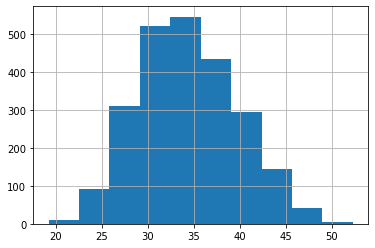

In [15]:
# ad_grouped = state_dataset.groupby(["Time Period Label","Time Period Start Date"])

# all_summary_stats = ad_grouped["Value"].agg([("Mean",np.mean),("Median",np.median),("Variance",np.var),("Standard Deviation",np.std),
#                                         ("SEM",st.sem)]).reset_index().sort_values("Time Period Start Date").reset_index(drop=True).set_index("Time Period Label")
# all_summary_stats
sum_mean = state_dataset["Value"].mean()
sum_median =state_dataset["Value"].median()
sum_var=state_dataset["Value"].var()
sum_stdev=state_dataset["Value"].std()
sum_sem=state_dataset["Value"].sem()
all_summary_stats = pd.DataFrame({"Mean":sum_mean,"Median":sum_median,"Variance":sum_var,
                                 "Standard Deviation":sum_stdev,"SEM":sum_sem},index=[0])
print(all_summary_stats)
values = state_dataset["Value"]
values.hist()
plt.show()

In [25]:
one_stdev = [(values.mean() - values.std()),(values.mean()+values.std())]
two_stdev = [(values.mean() - 2*(values.std())),(values.mean()+2*(values.std()))]
three_stdev = [(values.mean() - 3*(values.std())),(values.mean()+3*(values.std()))]
first_stdev = [x for x in values if x>one_stdev[0] and x<one_stdev[1]]
second_stdev = [x for x in values if x>two_stdev[0] and x<two_stdev[1]]
three_stdev =[x for x in values if x>three_stdev[0] and x<three_stdev[1]]

one = 100*(len(first_stdev)/len(values))
two = 100*(len(second_stdev)/len(values))
three = 100*(len(three_stdev)/len(values))


print(f'{round(one,2)}% of the values can be found one standardized deviation of the mean')
print(f'{round(two,2)}% of the values can be found two standardized deviations of the mean')
print(f'{round(three,2)}% of the values can be found three standardized deviations of the mean')

66.71% of the values can be found one standardized deviation of the mean
96.5% of the values can be found two standardized deviations of the mean
99.96% of the values can be found three standardized deviations of the mean


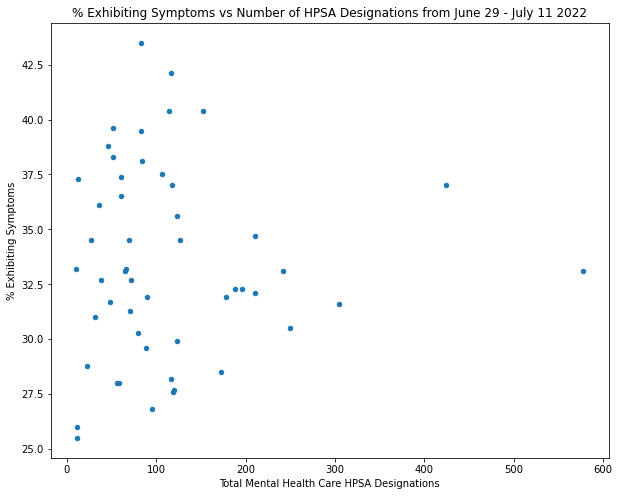

In [19]:
recent.plot(kind="scatter",x='Total Mental Health Care HPSA Designations',y="Value",ylabel="% Exhibiting Symptoms",
                    title="% Exhibiting Symptoms vs Number of HPSA Designations from June 29 - July 11 2022",figsize=(10,8))
plt.show()

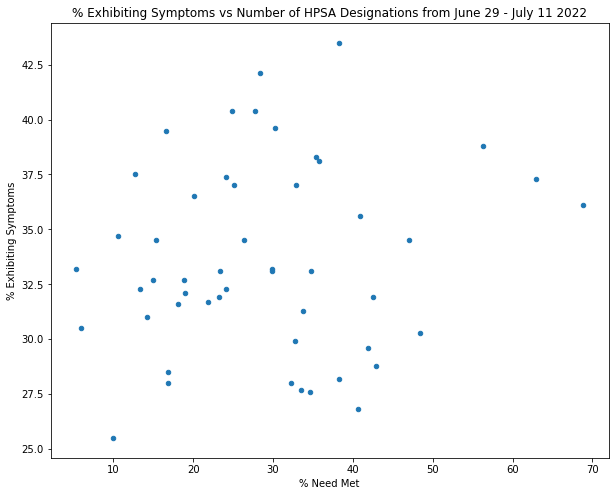

In [20]:
recent["% Need Met"]=recent["Percent of Need Met"]*100
recent.plot(kind="scatter",x='% Need Met',y="Value",ylabel="% Exhibiting Symptoms",
                    title="% Exhibiting Symptoms vs Number of HPSA Designations from June 29 - July 11 2022",figsize=(10,8))
plt.show()

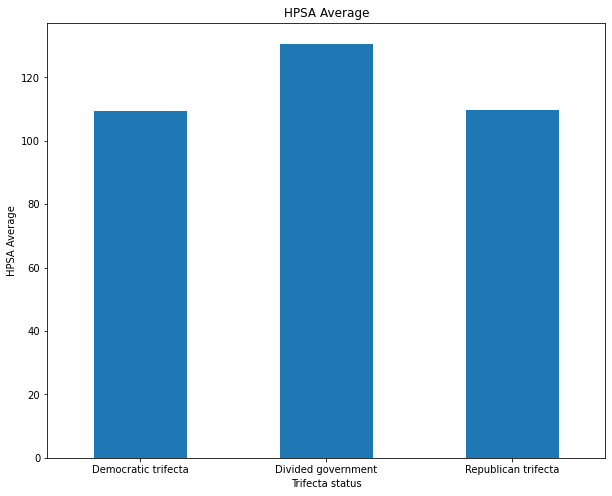

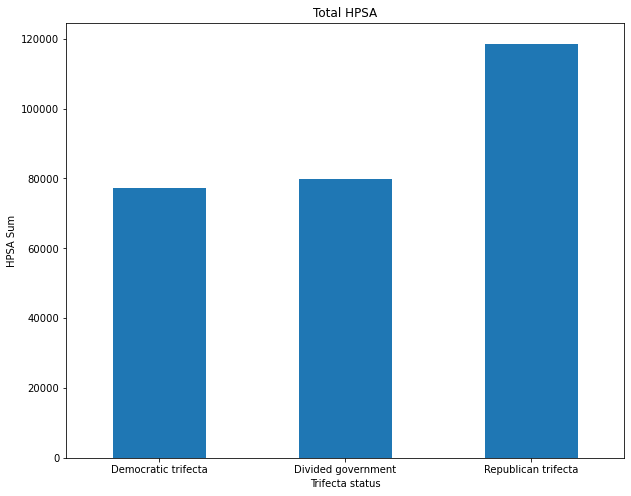

In [22]:
hpsa_st_gov_mean = state_dataset.groupby("Trifecta status").mean()["Total Mental Health Care HPSA Designations"]
hpsa_st_gov_max = state_dataset.groupby("Trifecta status").max()["Total Mental Health Care HPSA Designations"]
hpsa_st_gov_min = state_dataset.groupby("Trifecta status").min()["Total Mental Health Care HPSA Designations"]
percentneed_st_gov_mean = (state_dataset.groupby("Trifecta status").mean()["Percent of Need Met"])*100
percentneed__st_gov_max = (state_dataset.groupby("Trifecta status").max()["Percent of Need Met"])*100
percentneed__gov_min = (state_dataset.groupby("Trifecta status").min()["Percent of Need Met"])*100
hpsa_st_gov_count = state_dataset.groupby("Trifecta status").sum()["Total Mental Health Care HPSA Designations"]
value_st_gov_max =state_dataset.groupby("Trifecta status").max()["Value"]
value_st_gov_min=state_dataset.groupby("Trifecta status").min()["Value"]
value_st_gov_mean=state_dataset.groupby("Trifecta status").mean()["Value"]
summary_gov = pd.DataFrame({"HPSA Average":hpsa_st_gov_mean,
                           "HPSA Max":hpsa_st_gov_max,
                           "HPSA Min":hpsa_st_gov_min,
                           "HPSA Sum":hpsa_st_gov_count,
                            "% Need Met Average":percentneed_st_gov_mean,
                           "% Need Met Max":percentneed__st_gov_max,
                           "% Need Met Min":percentneed__gov_min})

summary_gov.plot(kind="bar",y="HPSA Average",ylabel="HPSA Average",figsize=(10,8),rot=360,legend=False,title="HPSA Average")
summary_gov.plot(kind="bar",y="HPSA Sum",ylabel="HPSA Sum",figsize=(10,8),rot=360,legend=False,title="Total HPSA")
plt.show()